In [1]:
import astropy.io.fits as fits

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import numpy as np
import matplotlib as mpl

In [9]:
file = fits.open('gaiadr2XwiseX2mass_orion_hrd_rc_gaussdust.fits')

In [4]:
data = file[1].data

In [5]:
data.dtype.names

('ra', 'dec', 'varpi_obs', 'varpi_err', 'dust_obs', 'dust_err')

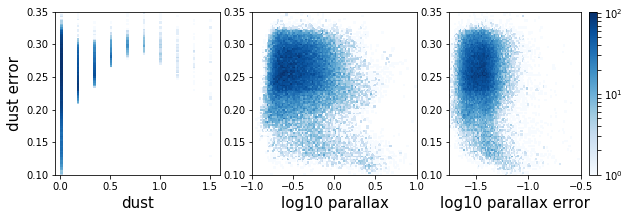

In [59]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
nbins = 100
xbins = np.linspace(-0.05, 1.6, nbins)
ybins = np.linspace(0.1, 0.35, nbins)

H, xe, ye = np.histogram2d(data['dust_obs'], data['dust_err'], bins=(xbins, ybins))
im = ax[0].pcolormesh(xe, ye, H.T,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'))#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
ax[0].set_xlabel('dust', fontsize=15)
ax[0].set_ylabel('dust error', fontsize=15)
#plt.colorbar()
#ax[0].set_title('correlation of dust and uncertainty')


xbins = np.linspace(-1, 1, nbins)
ybins = np.linspace(0.1, 0.35, nbins)

H, xe, ye = np.histogram2d(np.log10(data['varpi_obs']), data['dust_err'], bins=(xbins, ybins))
im = ax[1].pcolormesh(xe, ye, H.T,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'))#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
ax[1].set_xlabel('log10 parallax', fontsize=15)
#ax[1].title('correlation of parallax and uncertainty')


xbins = np.linspace(-1.75, -0.5, nbins)
ybins = np.linspace(0.1, 0.35, nbins)

H, xe, ye = np.histogram2d(np.log10(data['varpi_err']), data['dust_err'], bins=(xbins, ybins))
im = ax[2].pcolormesh(xe, ye, H.T ,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'))#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
ax[2].set_xlabel('log10 parallax error', fontsize=15)

plt.colorbar(im)

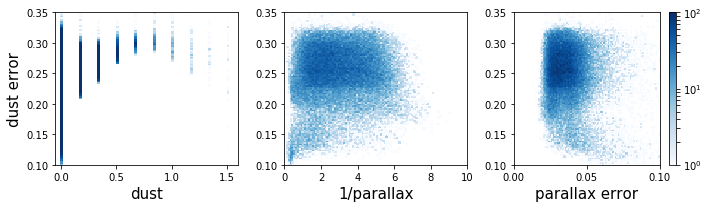

In [86]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
nbins = 100
xbins = np.linspace(-0.05, 1.6, nbins)
ybins = np.linspace(0.1, 0.35, nbins)
vmin = 1
vmax = 100
H, xe, ye = np.histogram2d(data['dust_obs'], data['dust_err'], bins=(xbins, ybins))
im = ax[0].pcolormesh(xe, ye, H.T,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'), vmin=vmin, vmax=vmax)#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
ax[0].set_xlabel('dust', fontsize=15)
ax[0].set_ylabel('dust error', fontsize=15)
#plt.colorbar()
#ax[0].set_title('correlation of dust and uncertainty')


xbins = np.linspace(0, 10, nbins)

H, xe, ye = np.histogram2d(1./data['varpi_obs'], data['dust_err'], bins=(xbins, ybins))
im = ax[1].pcolormesh(xe, ye, H.T,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'), vmin=vmin, vmax=vmax)#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
ax[1].set_xlabel('1/parallax', fontsize=15)
#ax[1].title('correlation of parallax and uncertainty')


xbins = np.linspace(0, 0.1, nbins)

H, xe, ye = np.histogram2d(data['varpi_err'], data['dust_err'], bins=(xbins, ybins))
im = ax[2].pcolormesh(xe, ye, H.T ,
      norm=mpl.colors.LogNorm(), cmap=plt.get_cmap('Blues'), vmin=vmin, vmax=vmax)#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
ax[2].set_xlabel('parallax error', fontsize=15)

plt.colorbar(im)
plt.tight_layout()
plt.savefig('dustErrors.pdf')

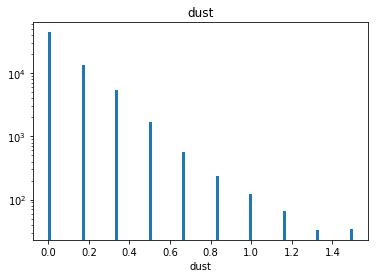

In [34]:
plt.hist(data['dust_obs'], bins=100,log=True)
plt.title('dust')
plt.xlabel('dust')
plt.savefig('dustDistributionOrion.png')

In [22]:
import numpy as np
from scipy.stats import norm

In [32]:
np.max(data['dust_obs'])

1.5

0.33333334 0
0.33333334 1
0.16666667 2
0.16666667 3
0.16666667 4
0.16666667 5
0.33333334 6
0.33333334 7
0.5 8
0.5 9
0.5 10
0.5 11
0.6666667 12
0.6666667 13
0.8333333 14
0.8333333 15
0.16666667 16
0.16666667 17
0.16666667 18
0.16666667 19


(0.1, 18.265016751612148)

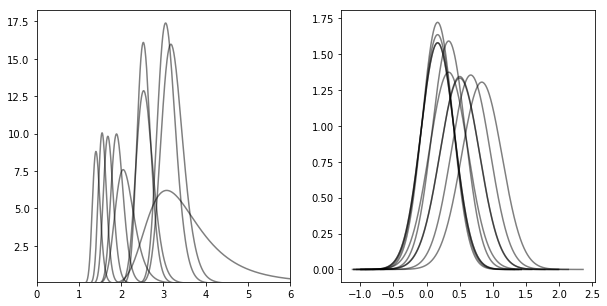

In [44]:
fig, axes = plt.subplots(1, 2, figsize = [10, 5])
j = 0
while j < 20:
    if data['dust_obs'][i] > 0:
        for ax, key in zip(axes, ['varpi_', 'dust_']):
            x_axis = np.arange(data[key + 'obs'][i] - 5*data[key + 'err'][i],
                           data[key + 'obs'][i] + 5*data[key + 'err'][i], 0.001)
            # Mean = 0, SD = 2.
            if key == 'varpi_':
                ax.plot(1./x_axis, norm.pdf(x_axis, data[key + 'obs'][i], data[key + 'err'][i]), color='black', alpha=0.5)
            else: ax.plot(x_axis, norm.pdf(x_axis, data[key + 'obs'][i], data[key + 'err'][i]), color='black', alpha=0.5)
            print(data['dust_obs'][i], j)
            j +=1
    i+=1
axes[0].set_xlim(0, 6)
axes[0].set_ylim(0.1,)
    

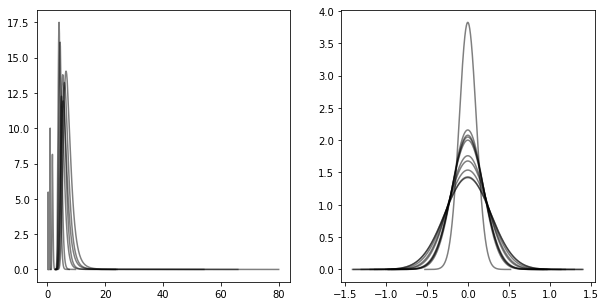

In [55]:
fig, axes = plt.subplots(1, 2, figsize = [10, 5])
positive = data['dust_obs'] > 0
n = np.random.randint(0, np.sum(positive), 10)
for i in np.random.randint(0, np.sum(positive), 10):
    for ax, key in zip(axes, ['varpi_', 'dust_']):
        x_axis = np.arange(data[key + 'obs'][i] - 5*data[key + 'err'][i],
                       data[key + 'obs'][i] + 5*data[key + 'err'][i], 0.001)
        # Mean = 0, SD = 2.
        if key == 'varpi_':
            ax.plot(1./x_axis, norm.pdf(x_axis, data[key + 'obs'][i], data[key + 'err'][i]), color='black', alpha=0.5)
        else: ax.plot(x_axis, norm.pdf(x_axis, data[key + 'obs'][i], data[key + 'err'][i]), color='black', alpha=0.5)



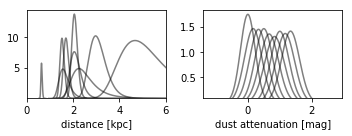

In [65]:
fig, axes = plt.subplots(1, 2, figsize = [5, 2])
uniq = np.unique(data['dust_obs']) 

for j in range(len(uniq[1:])):
    i = np.where(data['dust_obs'] == uniq[j])[0][0]
    for ax, key in zip(axes, ['varpi_', 'dust_']):
        x_axis = np.arange(data[key + 'obs'][i] - 5*data[key + 'err'][i],
                       data[key + 'obs'][i] + 5*data[key + 'err'][i], 0.001)
        # Mean = 0, SD = 2.
        if key == 'varpi_':
            ax.plot(1./x_axis, norm.pdf(x_axis, data[key + 'obs'][i], data[key + 'err'][i]), color='black', alpha=0.5)
        else: ax.plot(x_axis, norm.pdf(x_axis, data[key + 'obs'][i], data[key + 'err'][i]), color='black', alpha=0.5)
axes[0].set_xlim(0, 6)
for ax in axes:ax.set_ylim(0.1,)
axes[0].set_xlabel('distance [kpc]')
axes[1].set_xlabel('dust attenuation [mag]')
plt.tight_layout()
plt.savefig('dust_distance.pdf')

In [56]:
np.unique(data['dust_obs'])

array([0.        , 0.16666667, 0.33333334, 0.5       , 0.6666667 ,
       0.8333333 , 1.        , 1.1666666 , 1.3333334 , 1.5       ],
      dtype=float32)

In [51]:
np.random.rand?

Docstring:
rand(d0, d1, ..., dn)

Random values in a given shape.

Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, should all be positive.
    If no argument is given a single Python float is returned.

Returns
-------
out : ndarray, shape ``(d0, d1, ..., dn)``
    Random values.

See Also
--------
random

Notes
-----
This is a convenience function. If you want an interface that
takes a shape-tuple as the first argument, refer to
np.random.random_sample .

Examples
--------
>>> np.random.rand(3,2)
array([[ 0.14022471,  0.96360618],  #random
       [ 0.37601032,  0.25528411],  #random
       [ 0.49313049,  0.94909878]]) #random
Type:      builtin_function_or_method
